# Data Analysis
##### 1. Source -----> kaggle
#### 2. EDA

In [1]:
# importing the lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the csv file.
df = pd.read_csv(r'D:\US_accident_EDA-Project\US_Accidents.csv')

In [4]:
# observe the data from the top.
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
# observe the shape of the data.
df.shape

(2845342, 47)

# Data Preparation & Cleaning

#### get some info about the data
#### handel missing values

In [6]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [9]:
df.corr()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
Severity,1.000000,0.089207,0.114063,0.089209,0.114064,0.092140,-0.000689,-0.045335,-0.097459,0.037802,...,0.008141,0.045928,-0.002359,-0.001747,-0.000773,-0.018017,-0.002536,-0.003009,-0.012798,NaN
Start_Lat,0.089207,1.000000,-0.154965,0.999995,-0.154962,0.071588,0.101281,-0.475065,-0.505567,0.005876,...,0.007851,0.043628,-0.017348,0.003184,-0.003366,-0.107697,0.010817,-0.003164,-0.058208,NaN
Start_Lng,0.114063,-0.154965,1.000000,-0.154956,0.999999,0.039861,-0.170566,0.032159,0.010849,0.170909,...,0.018110,-0.017202,0.006220,-0.015450,0.000450,0.038533,-0.040265,-0.007750,0.059568,NaN
End_Lat,0.089209,0.999995,-0.154956,1.000000,-0.154953,0.071593,0.101270,-0.475058,-0.505561,0.005869,...,0.007840,0.043621,-0.017347,0.003184,-0.003366,-0.107696,0.010827,-0.003163,-0.058210,NaN
End_Lng,0.114064,-0.154962,0.999999,-0.154953,1.000000,0.039830,-0.170563,0.032163,0.010852,0.170904,...,0.018110,-0.017199,0.006220,-0.015449,0.000450,0.038533,-0.040264,-0.007750,0.059566,NaN
Distance(mi),0.092140,0.071588,0.039861,0.071593,0.039830,1.000000,0.067331,-0.051212,-0.060094,0.026860,...,-0.006655,0.022442,-0.010184,-0.021462,-0.002491,-0.052826,-0.027108,-0.007322,-0.105722,NaN
Number,-0.000689,0.101281,-0.170566,0.101270,-0.170563,0.067331,1.000000,-0.051146,-0.049400,0.015825,...,-0.003792,-0.010801,-0.005052,-0.013668,-0.001360,-0.028485,-0.003688,-0.005075,-0.058870,NaN
Temperature(F),-0.045335,-0.475065,0.032159,-0.475058,0.032163,-0.051212,-0.051146,1.000000,0.993857,-0.366527,...,-0.005524,-0.020358,0.011610,0.003108,0.002122,0.061248,0.000021,0.005672,0.047657,NaN
Wind_Chill(F),-0.097459,-0.505567,0.010849,-0.505561,0.010852,-0.060094,-0.049400,0.993857,1.000000,-0.346028,...,-0.007584,-0.048784,0.012066,0.005062,0.002466,0.069379,0.005424,0.007140,0.048321,NaN
Humidity(%),0.037802,0.005876,0.170909,0.005869,0.170904,0.026860,0.015825,-0.366527,-0.346028,1.000000,...,0.000063,0.006394,-0.007099,-0.000309,0.000904,-0.000095,-0.015631,-0.005727,-0.034133,NaN


In [10]:
# let us check what kind of data is available on the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [11]:
#  let's count numerical col in the data.
numerical = ['int16','int32','int64','float16','float32','float64']
numerical_df = df.select_dtypes(include = numerical )
numerical_df

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3,40.108910,-83.092860,40.112060,-83.031870,3.230,NaN,42.1,36.1,58.0,29.76,10.0,10.4,0.00
1,2,39.865420,-84.062800,39.865010,-84.048730,0.747,NaN,36.9,NaN,91.0,29.68,10.0,NaN,0.02
2,2,39.102660,-84.524680,39.102090,-84.523960,0.055,NaN,36.0,NaN,97.0,29.70,10.0,NaN,0.02
3,2,41.062130,-81.537840,41.062170,-81.535470,0.123,NaN,39.0,NaN,55.0,29.65,10.0,NaN,NaN
4,3,39.172393,-84.492792,39.170476,-84.501798,0.500,NaN,37.0,29.8,93.0,29.69,10.0,10.4,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,34.002480,-117.379360,33.998880,-117.370940,0.543,NaN,86.0,86.0,40.0,28.92,10.0,13.0,0.00
2845338,2,32.766960,-117.148060,32.765550,-117.153630,0.338,NaN,70.0,70.0,73.0,29.39,10.0,6.0,0.00
2845339,2,33.775450,-117.847790,33.777400,-117.857270,0.561,NaN,73.0,73.0,64.0,29.74,10.0,10.0,0.00
2845340,2,33.992460,-118.403020,33.983110,-118.395650,0.772,NaN,71.0,71.0,81.0,29.62,10.0,8.0,0.00


In [12]:
len(numerical_df)

2845342

In [13]:
len(df)

2845342

# Checking the null values in the data

In [14]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [15]:
df.isnull().sum().sum()

3414349

# Percentage of missing value per col.

In [17]:
df.isnull().sum().sum()

3414349

In [18]:
df.isnull().sum().sort_values(ascending=False)


Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

In [19]:
# finding the percentage
missing_value_per = df.isnull().sum().sort_values(ascending=False)/len(df)


In [21]:
missing_value_per*100

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

<AxesSubplot:>

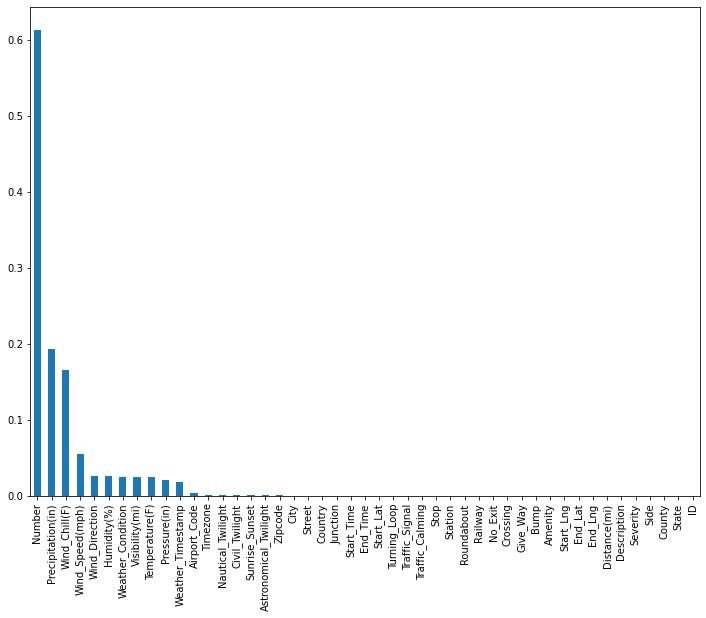

In [30]:
# viz
# missing values graph
missing_value_per.plot(kind = 'bar',figsize = (12,9))

In [31]:
# Analyse a graph and try to plot a graph for non missing values col.

missing_value_per>0

Number                    True
Precipitation(in)         True
Wind_Chill(F)             True
Wind_Speed(mph)           True
Wind_Direction            True
Humidity(%)               True
Weather_Condition         True
Visibility(mi)            True
Temperature(F)            True
Pressure(in)              True
Weather_Timestamp         True
Airport_Code              True
Timezone                  True
Nautical_Twilight         True
Civil_Twilight            True
Sunrise_Sunset            True
Astronomical_Twilight     True
Zipcode                   True
City                      True
Street                    True
Country                  False
Junction                 False
Start_Time               False
End_Time                 False
Start_Lat                False
Turning_Loop             False
Traffic_Signal           False
Traffic_Calming          False
Stop                     False
Station                  False
Roundabout               False
Railway                  False
No_Exit 

In [32]:
missing_value_per[missing_value_per>0]

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

<AxesSubplot:>

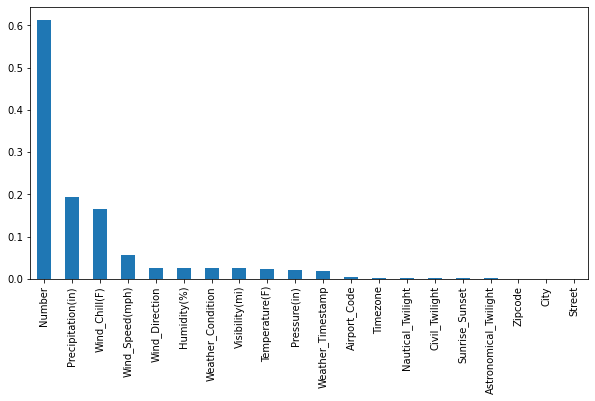

In [33]:
missing_value_per[missing_value_per>0].plot(kind='bar',figsize=(10,5))

# Remove the col which have more than 50% missing values

In [34]:
missing_value_per[missing_value_per>0.5]

Number    0.6129
dtype: float64

In [ ]:
newdf = df.drop(['Number'],axis = 1)

In [ ]:
newdf.head()